-  implemented the assigned target masking based on the threshold (known spec carton and a priority lower (boosted) than 950.)

In [1]:
import glob
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
import matplotlib.font_manager as font_manager
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
font_prop = font_manager.FontProperties(size=18)
plt.rcParams["font.family"] = "Times"
%matplotlib inline

files = glob.glob("XMMLSS_design*.fits")
files

['XMMLSS_design1.fits', 'XMMLSS_design2.fits', 'XMMLSS_design3.fits']

XMMLSS_design1.fits
364
364


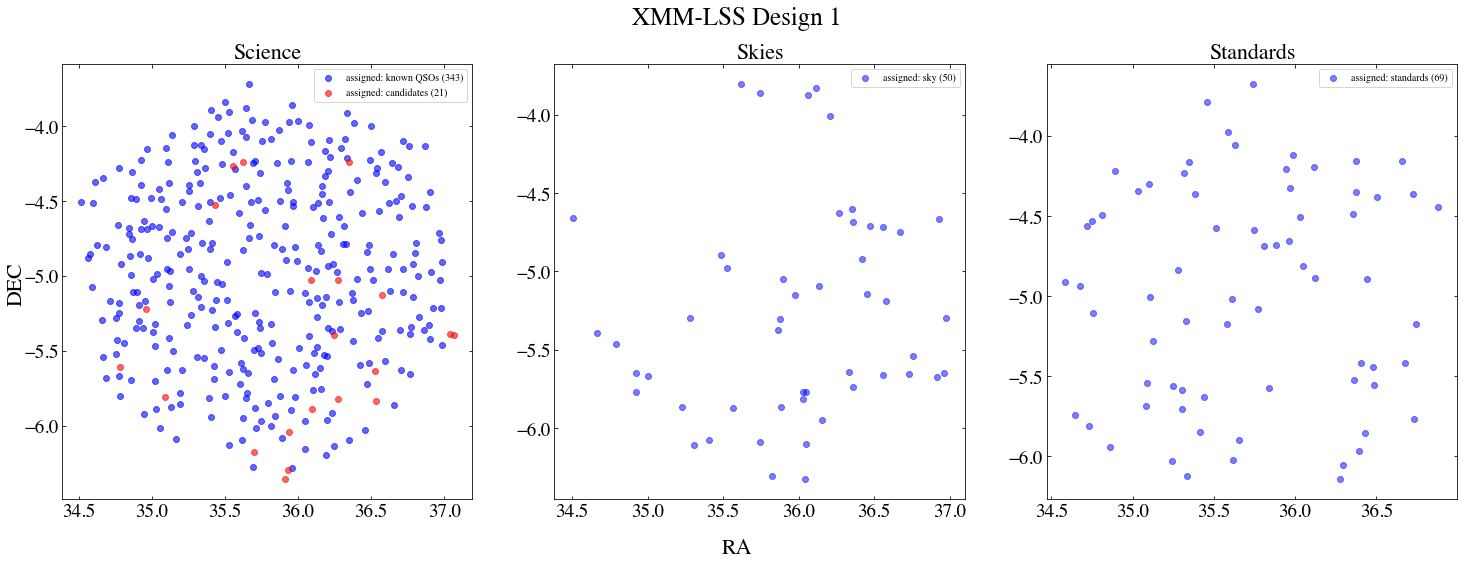

XMMLSS_design2.fits
362
362


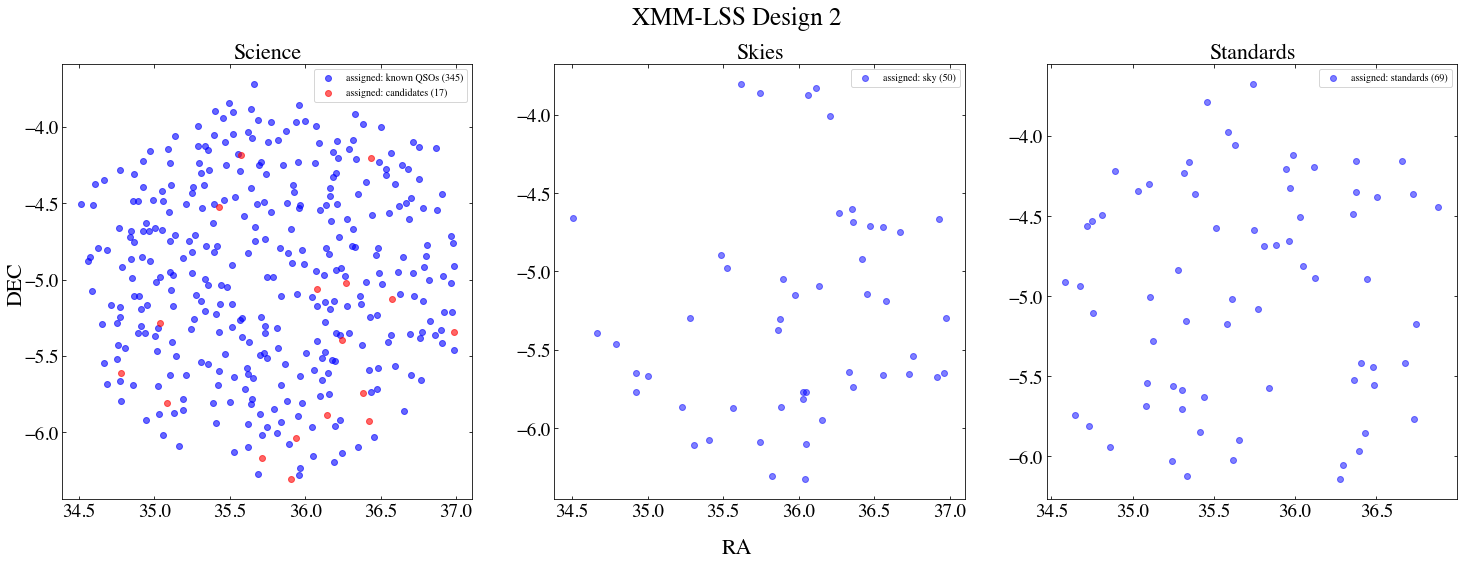

XMMLSS_design3.fits
363
363


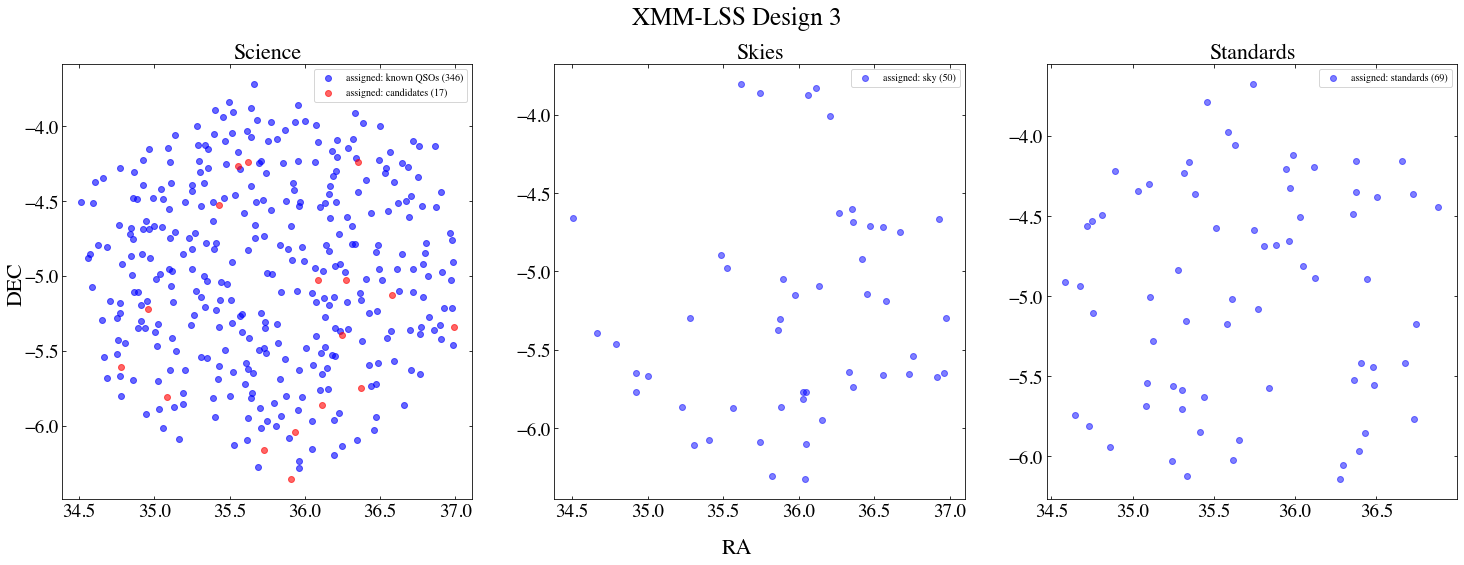

In [33]:
size=20
n=1
for i in files:
    print(i)
    data2 = Table.read(i, hdu = 2, format='fits')
    data1 = Table.read(i, hdu = 1, format='fits')

s

    plt.savefig("design{}_layout.png".format(i.split("design")[1].split(".fits")[0]), bbox_inches ='tight',facecolor='white',dpi=300)

    plt.show()
    n+=1

In [3]:
#plot the XMMLSS targets on the field
from astropy.table import Table
import numpy as np


#import the cartons
#read in data file
#SAVE COLUMNS TO NUMPY ARRAYS
cartdata = Table.read("./PA_testing/BHM_cartons_v0.5.fits", format='fits')

#the arrays, the only ones we really care about are catid and priority
catalogid = np.array(cartdata["catalogid"], dtype=np.int64)
ra = np.array(cartdata["ra"])
dec = np.array(cartdata["dec"])
target_pk = np.array(cartdata["target_pk"], dtype=np.int64)
priority = np.array(cartdata["priority"])
value = np.array(cartdata["value"])
carton = np.array(cartdata["carton"],dtype=str )
instrument = np.array(cartdata["instrument"], dtype='<U10')
carton_to_target_pk = np.array(cartdata['carton_to_target_pk'])
g = np.array(cartdata['g'])
r = np.array(cartdata['r'])
i = np.array(cartdata['i'])
bp = np.array(cartdata['bp'])
gaia_g = np.array(cartdata['gaia_g'])
rp = np.array(cartdata['rp'])
h = np.array(cartdata['h'])
len(carton)

3170

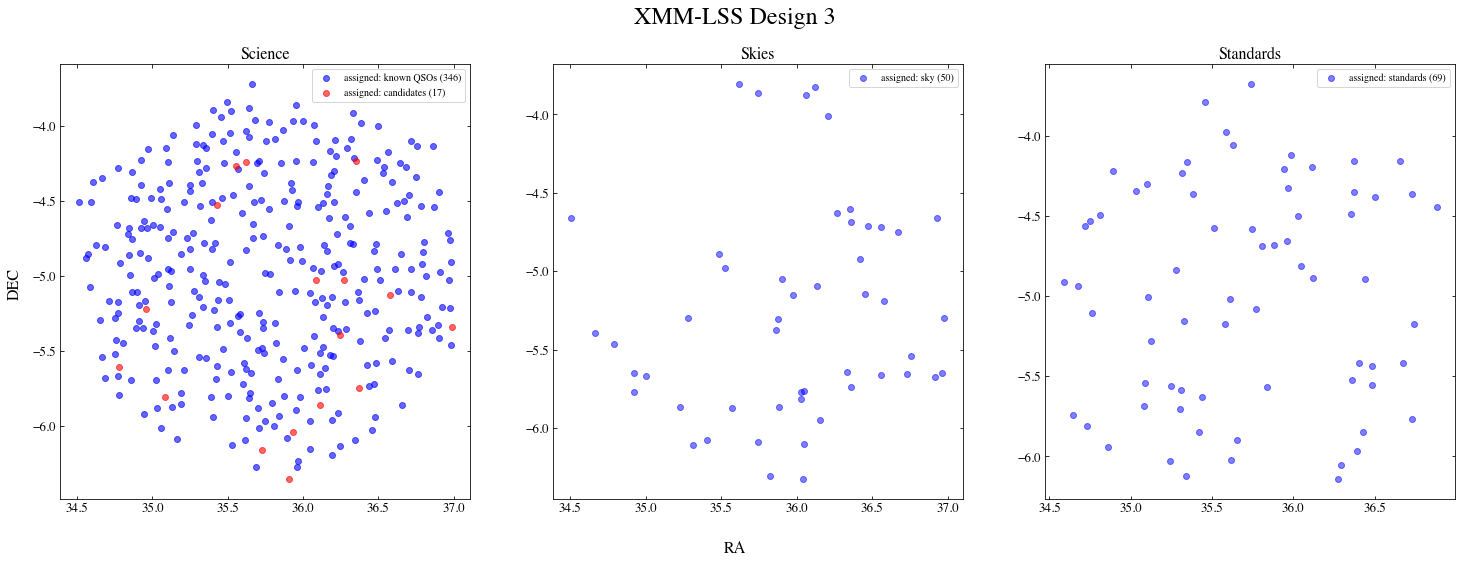

In [29]:
fig, axs = plt.subplots(1, 3, figsize=(25, 8))

axs[0].scatter(data1["ra"][assigned_SCIENCEfibers][assigned_QSOs], data1["dec"][assigned_SCIENCEfibers][assigned_QSOs],
            color = "blue", alpha = 0.6, 
            label="assigned: known QSOs ({})".format(len(data1["ra"][assigned_SCIENCEfibers][assigned_QSOs])))
axs[0].scatter(data1["ra"][assigned_SCIENCEfibers][~assigned_QSOs], data1["dec"][assigned_SCIENCEfibers][~assigned_QSOs],
            color = "red", alpha = 0.6, 
            label="assigned: candidates ({})".format(len(data1["ra"][assigned_SCIENCEfibers][~assigned_QSOs])))

axs[1].scatter(data1["ra"][assigned_sky], data1["dec"][assigned_sky],
            color = "blue", alpha = 0.5, 
            label="assigned: sky ({})".format(len(data1["ra"][assigned_sky])))
axs[2].scatter(data1["ra"][assigned_standards], data1["dec"][assigned_standards],
            color = "blue", alpha = 0.5, 
            label="assigned: standards ({})".format(len(data1["ra"][assigned_standards])))
axs[0].legend()
axs[1].legend()
axs[2].legend()
axs[0].set_title("Science", fontsize=size+2)
axs[1].set_title("Skies", fontsize=size+2)
axs[2].set_title("Standards", fontsize=size+2)

#axs.set_xlabel('RA', fontsize=size)
#axs.set_ylabel('Dec', fontsize=size)
plt.suptitle("XMM-LSS Design {}".format(i.split("design")[1].split(".fits")[0]), fontsize=size+10)
axs[0].tick_params(axis='both', which='major', labelsize=size-1, 
               top=True, right=True, bottom=True, left=True, direction='in')
axs[0].tick_params(axis='both', which='minor', labelsize=size-1, 
               top=True, right=True, bottom=True, left=True, direction='in')
axs[1].tick_params(axis='both', which='major', labelsize=size-1, 
               top=True, right=True, bottom=True, left=True, direction='in')
axs[1].tick_params(axis='both', which='minor', labelsize=size-1, 
               top=True, right=True, bottom=True, left=True, direction='in')
axs[2].tick_params(axis='both', which='major', labelsize=size-1, 
               top=True, right=True, bottom=True, left=True, direction='in')
axs[2].tick_params(axis='both', which='minor', labelsize=size-1, 
               top=True, right=True, bottom=True, left=True, direction='in')
# Set common labels
fig.text(0.5, 0.04, 'RA', ha='center', va='center', fontsize=size+2)
fig.text(0.1, 0.5, 'DEC', ha='center', va='center', rotation='vertical', fontsize=size+2)
plt.show()

In [4]:
#quick science mask
science_targs = ((carton=='bhm_rm_core')|((carton=='bhm_rm_var'))|((carton=='bhm_rm_ancil'))|(carton=='bhm_rm_known_spec'))
len(ra[science_targs])

2414

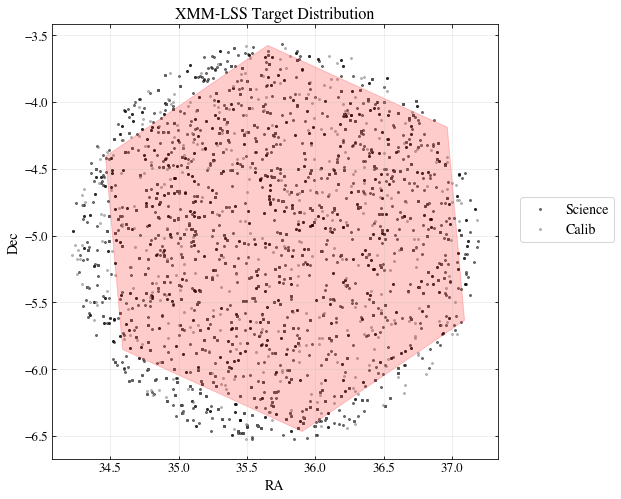

In [5]:
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.patches import RegularPolygon
from matplotlib.collections import PatchCollection


size=14
fig, axs = plt.subplots(1, 1, figsize=(8, 8))
axs.grid(alpha=0.25, zorder=0)
axs.scatter(ra[science_targs], dec[science_targs],s=4, alpha=0.5, color='black', label='Science')
axs.scatter(ra[~science_targs], dec[~science_targs],s=4, alpha=0.5, color='grey', label='Calib')

patches = []

polygon = RegularPolygon((35.77533,-5.0165), 6, radius=1.45, orientation=np.radians(5.0),label='FPS hex')
patches.append(polygon)

p = PatchCollection(patches, color='red', alpha=0.2)

axs.add_collection(p)




axs.legend(loc=(1.05,0.5), prop={"size":size})
axs.set_xlabel('RA', fontsize=size)
axs.set_ylabel('Dec', fontsize=size)
axs.set_title("XMM-LSS Target Distribution", fontsize=size+2)
axs.tick_params(axis='both', which='major', labelsize=size-1, 
               top=True, right=True, bottom=True, left=True, direction='in')
axs.tick_params(axis='both', which='minor', labelsize=size-1, 
               top=True, right=True, bottom=True, left=True, direction='in')
plt.savefig("./XMMLSS_targdist.png", dpi=300, bbox_inches='tight',facecolor="white")

# Saving target info for Jon

In [6]:
#Design 1
des1= "./XMMLSS_design1.fits"
data21 = Table.read(des1, hdu = 2, format='fits')
data11 = Table.read(des1, hdu = 1, format='fits')

des2= "./XMMLSS_design2.fits"
data22 = Table.read(des2, hdu = 2, format='fits')
data12 = Table.read(des2, hdu = 1, format='fits')

des3= "./XMMLSS_design3.fits"
data23 = Table.read(des3, hdu = 2, format='fits')
data13 = Table.read(des3, hdu = 1, format='fits')

#masking for assignment allocation1
assigned_SCIENCEfibers1 = ((data21['assigned'] == 1) & (data11['category'] == 'science'))
print(len(data11[assigned_SCIENCEfibers1]))

#masking for assignment allocation2
assigned_SCIENCEfibers2 = ((data22['assigned'] == 1) & (data12['category'] == 'science'))
print(len(data12[assigned_SCIENCEfibers2]))

#masking for assignment allocation3
assigned_SCIENCEfibers3 = ((data23['assigned'] == 1) & (data13['category'] == 'science'))
print(len(data13[assigned_SCIENCEfibers3]))

#core.append(len(data1[assigned_core]))

364
362
363


In [9]:
kstarg_overlap = np.array(list(set(data11['catalogid'][assigned_SCIENCEfibers1]) | set(data12['catalogid'][assigned_SCIENCEfibers2]) | set(data13['catalogid'][assigned_SCIENCEfibers3])))

In [10]:
len(kstarg_overlap)

381

In [16]:
filename = r"XMMLSS_sciencetargs.dat"
f = open(filename, 'w')
print("# catalogid      ra      dec",file=f)
for i in kstarg_overlap:
    try:
        print("{} {} {}".format( data11['catalogid'][assigned_SCIENCEfibers1][np.where(data11['catalogid'][assigned_SCIENCEfibers1] == i)][0],  data11['ra'][assigned_SCIENCEfibers1][np.where(data11['catalogid'][assigned_SCIENCEfibers1] == i)][0],  data11['dec'][assigned_SCIENCEfibers1][np.where(data11['catalogid'][assigned_SCIENCEfibers1] == i)][0]),file=f)
        
    except:
        try:
            print("{} {} {}".format( data12['catalogid'][assigned_SCIENCEfibers2][np.where(data12['catalogid'][assigned_SCIENCEfibers2] == i)][0],  data12['ra'][assigned_SCIENCEfibers2][np.where(data12['catalogid'][assigned_SCIENCEfibers2] == i)][0],  data12['dec'][assigned_SCIENCEfibers2][np.where(data12['catalogid'][assigned_SCIENCEfibers2] == i)][0]),file=f)
            
        except:
            try:
                print("{} {} {}".format( data13['catalogid'][assigned_SCIENCEfibers3][np.where(data13['catalogid'][assigned_SCIENCEfibers3] == i)][0],  data13['ra'][assigned_SCIENCEfibers3][np.where(data13['catalogid'][assigned_SCIENCEfibers3] == i)][0],  data13['dec'][assigned_SCIENCEfibers3][np.where(data13['catalogid'][assigned_SCIENCEfibers3] == i)][0]),file=f)
                
            except:
                print("huh, that's not it")

f.close()    